In [26]:
from google.colab import files
uploaded = files.upload()

Saving dataset-2.csv to dataset-2 (1).csv


# STEP 1: Business Objective

### Goal:
Paisabazaar, one of India’s largest financial platforms, aims to classify customers based on their credit scores into three categories:
- Good
- Standard
- Poor

### 1. Detect Fraud Risks
Early detection of risky customers helps reduce default and fraud losses.

###2. Automate Loan Approvals
Credit score-based filtering allows faster, real-time loan approvals and disbursals.

###3. Evaluate Creditworthiness
Analyze financial behavior to assess loan repayment capacity and offer personalized products.

Business Impact:  
This model helps Paisabazaar minimize financial risks, automate credit decisions, and improve user trust.


#STEP 2: Dataset Overview

### Dataset Summary:
- **Records**: 100,000 customer entries
- **Columns**: 28 features, including both numerical and categorical data

### Target Variable:
- Credit_Score — This is the classification label with values:
  - `Good`
  - `Standard`
  - `Poor`

### Key Features:
Column Name
`Age`
`Annual_Income`
`Monthly_Inhand_Salary`
`Num_Credit_Card`  
`Outstanding_Debt`
`Total_EMI_per_month`
`Num_Credit_Inquiries`
`Credit_Mix`
`Payment_Behaviour`
`Payment_of_Min_Amount`

The dataset contains detailed financial, behavioral, and demographic data for customers across multiple months — ideal for credit risk assessment.

In [27]:
#STEP 3: Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [28]:
sns.set(style='whitegrid')

In [29]:
#STEP 4: Load & Explore the Data
import pandas as pd
df = pd.read_csv('dataset-2.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [30]:
df = pd.read_csv("dataset-2.csv")
df.shape

(100000, 28)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [32]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


In [35]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [36]:
df.nunique()

,0
ID,100000
Customer_ID,12500
Month,8
Name,10128
Age,43
SSN,12500
Occupation,15
Annual_Income,12488
Monthly_Inhand_Salary,13241
Num_Bank_Accounts,12


In [37]:
#STEP 5: Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Credit_Score_Label'] = le.fit_transform(df['Credit_Score'])  # Good=1, Standard=2, Poor=0
df['Credit_Mix_Label'] = le.fit_transform(df['Credit_Mix'])
df['Payment_Min_Label'] = le.fit_transform(df['Payment_of_Min_Amount'])
df['Payment_Behaviour_Label'] = le.fit_transform(df['Payment_Behaviour'])
df['Occupation_Label'] = le.fit_transform(df['Occupation'])

Text(0.5, 1.0, 'Credit Score Distribution')

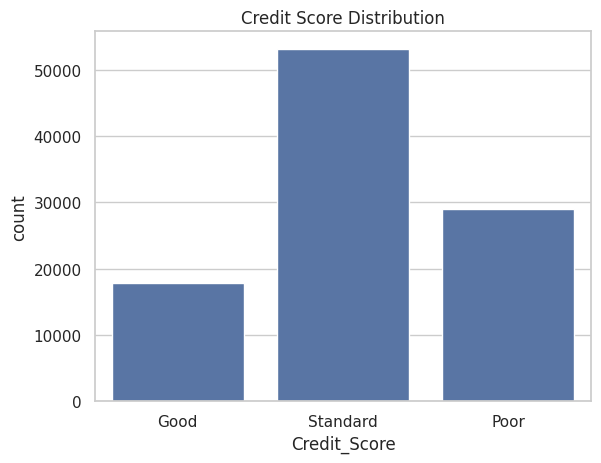

In [38]:
#STEP 6: Visualizations
#Credit Score Count
sns.countplot(x='Credit_Score', data=df)
plt.title("Credit Score Distribution")
plt.show()

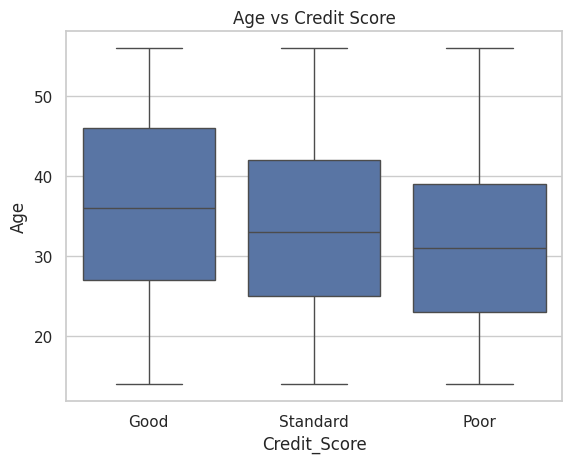

In [43]:
#Age vs Credit Score
sns.boxplot(x='Credit_Score', y='Age', data=df)
plt.title("Age vs Credit Score")
plt.show()

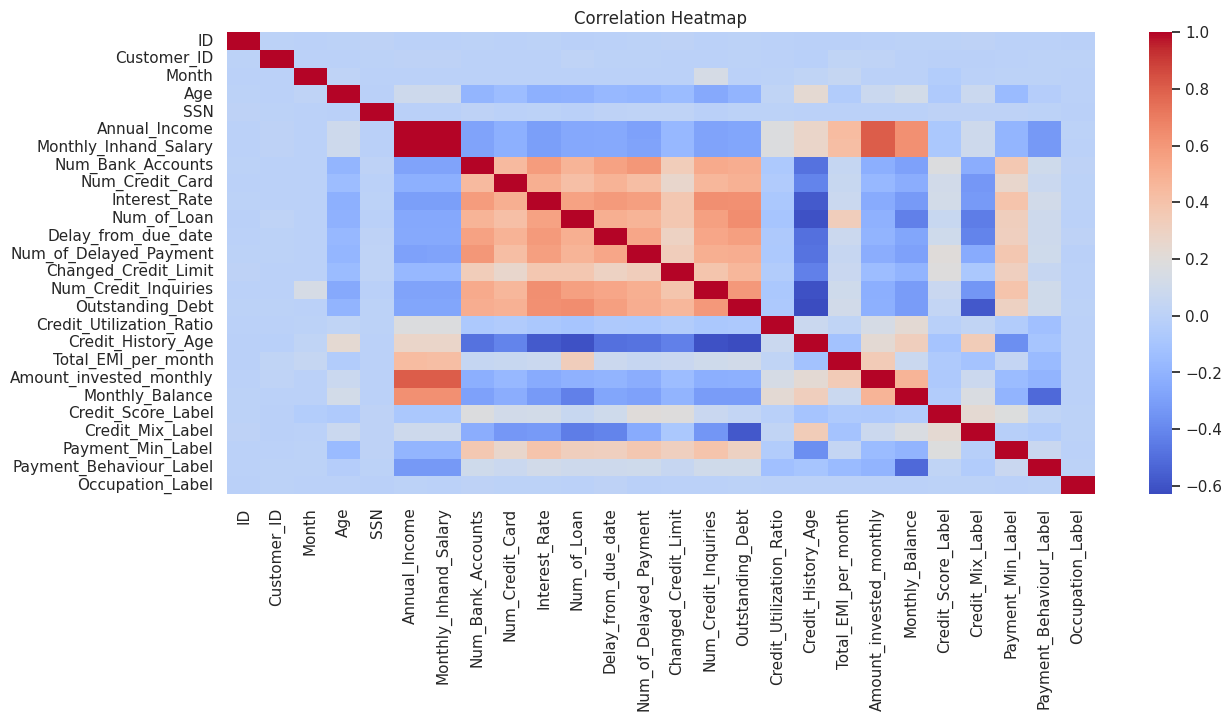

In [44]:
#Correlation Heatmap
encoded = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(14, 6))
sns.heatmap(encoded.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<Axes: xlabel='Credit_Score', ylabel='Total_EMI_per_month'>

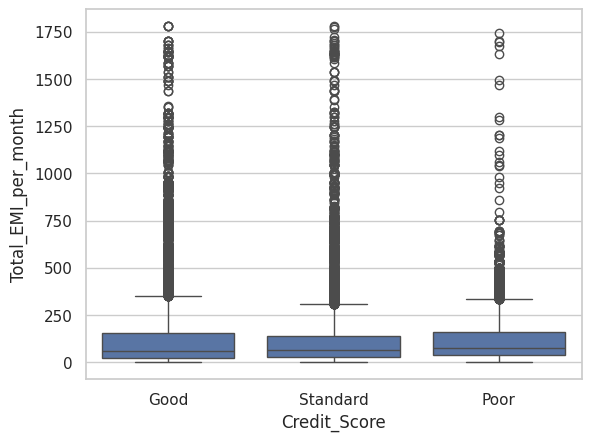

In [41]:
 #EMI vs Credit Score
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df)

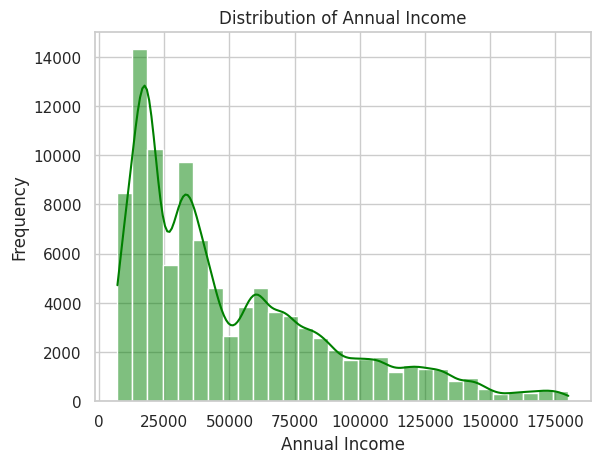

In [45]:
#Annual Income Distribution
sns.histplot(df['Annual_Income'], bins=30, kde=True, color='green')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

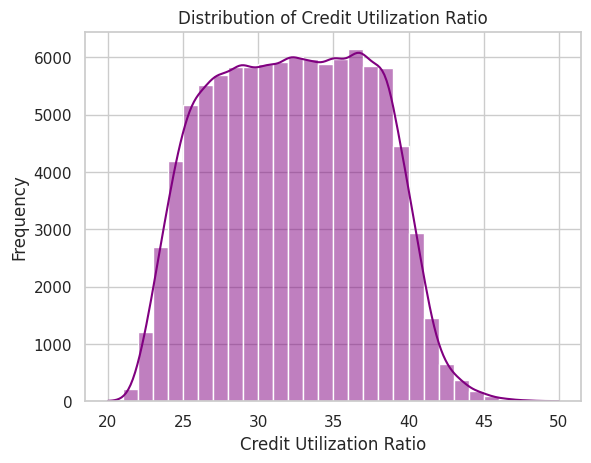

In [46]:
#Credit Utilization Ratio
sns.histplot(df['Credit_Utilization_Ratio'], bins=30, kde=True, color='purple')
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

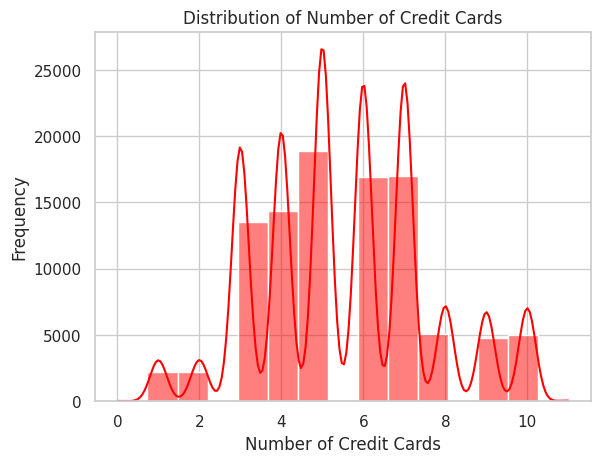

In [47]:
#Number of Credit Cards
sns.histplot(df['Num_Credit_Card'], bins=15, kde=True, color='red')
plt.title('Distribution of Number of Credit Cards')
plt.xlabel('Number of Credit Cards')
plt.ylabel('Frequency')
plt.show()

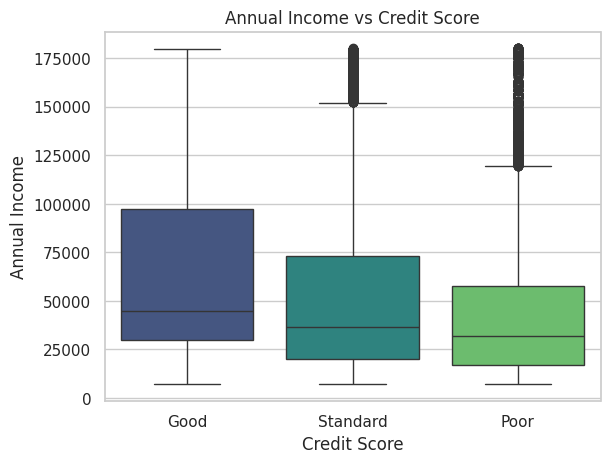

In [48]:
#annual Income vs Credit Score
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette='viridis')
plt.title('Annual Income vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

#STEP 7: Business Milestone

### Objective:
After performing EDA, we now understand the key drivers behind a customer's credit score. The next business goal is to **use this knowledge for actionable decisions**.

###1. **Build Machine Learning Models**
Now that the data is clean and important features are identified, Paisabazaar can:
- Use supervised learning algorithms like **Logistic Regression**, **Random Forest**, or **Decision Trees**
- Train these models on historical data to **predict future credit scores**

### 2. **Predict Credit Risk Categories**
The target variable `Credit_Score` has 3 classes:
- Good
- Standard
- Poor

Using the patterns uncovered (e.g., high EMI or low in-hand salary), models can predict:
- Who is **likely to default**
- Who qualifies as **low-risk**
- Who needs **manual verification**

### 3. **Detect Fraud in Early Stages**
Patterns like:
- High number of credit inquiries
- Irregular payment behavior
- Extreme credit utilization

...can be flagged as **fraud risk indicators**. This helps:
- Reduce financial loss
- Prevent issuing loans to default-prone applicants

###Outcome:
Paisabazaar can integrate this model into their system to:
- Speed up approval processes
- Offer personalized products
- Improve financial safety and regulatory compliance


# STEP 8: Final Summary

###Data Readiness
- The dataset is **clean**, with no missing values or incorrect types.
- Categorical variables were **successfully encoded**.
- Numerical variables were **analyzed and visualized** for outliers and distributions.

###Key Insights from EDA:
- **High Annual Income** and **Low EMI Payments** are strongly associated with **Good Credit Scores**.
- **Poor Credit Scores** often correlate with:
  - **High Number of Credit Inquiries**
  - **Late or Minimum Payments**
  - **High Credit Utilization Ratio**

### Business Readiness for ML Modeling:
- The dataset is now prepared for training **supervised machine learning models** such as:
  - Logistic Regression
  - Decision Tree Classifier
  - Random Forest Classifier

- Features like `Outstanding_Debt`, `Total_EMI_per_month`, and `Payment_Behaviour` are **good predictors** for credit scoring.

### Business Value:
- These insights help **automate credit approvals**,
- Improve **fraud detection**,
- And **personalize credit products** offered to users based on risk level.

**Conclusion**: The project has met its goal of understanding credit score patterns and preparing the ground for accurate, automated credit scoring using machine learning.
